In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import getpass
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy as sal

In [3]:
# S3
BUCKET_NAME = 'dse-grp3-capstone-data'

# RDS
ENDPOINT = 'capstone.clihskgj8i7s.us-west-2.rds.amazonaws.com'
USER = 'group3'
DB = 'db1'
PASSWORD = getpass.getpass('Enter database password')

Enter database password········


In [4]:
engine = sal.create_engine(f'postgresql://{USER}:{PASSWORD}@{ENDPOINT}/{DB}')
conn = engine.raw_connection()

In [5]:
# get stations from bay area
bay_area_stations = pd.read_sql(f'SELECT DISTINCT station FROM traffic_train', conn)['station']

In [6]:
bay_area_stations

0      401936
1      400750
2      400790
3      407370
4      400414
        ...  
315    400823
316    400168
317    401014
318    403329
319    401440
Name: station, Length: 320, dtype: int64

In [9]:
bay_area_stations.values

array([401936, 400750, 400790, 407370, 400414, 400654, 404435, 400971,
       400097, 403404, 400057, 401810, 400257, 407187, 402284, 402061,
       400227, 400160, 400700, 400240, 407359, 407172, 404453, 400714,
       413026, 405701, 404462, 400951, 400298, 400209, 407331, 401495,
       400772, 402359, 401391, 407321, 407194, 403401, 403406, 407153,
       407323, 400822, 402363, 402118, 403265, 407342, 403414, 400158,
       402372, 401606, 400088, 400832, 407204, 400221, 407332, 401996,
       403402, 402285, 407161, 403412, 407151, 402057, 401811, 402067,
       401464, 400336, 400952, 409529, 401817, 407360, 400907, 407152,
       414284, 405619, 402060, 407202, 400828, 401655, 402120, 400069,
       407177, 400869, 400040, 400147, 407191, 400017, 400238, 400148,
       407344, 407184, 402121, 400664, 407337, 404553, 400965, 402366,
       400922, 400995, 401567, 400970, 404434, 400760, 400280, 413845,
       400440, 404753, 407711, 400508, 407339, 407372, 407348, 400904,
      

In [57]:
stations = pd.read_sql(f'SELECT * FROM pemslocs WHERE sid IN {tuple(station_ids)}', conn)
stations

,sid,fwy,direc,district,county,city,state_pm,abs_pm,latitude,longitude,length,stype,lanes,name
0,400001,101,N,4,85,68000.0,38.26,387.897,37.364085,-121.901149,0.265,ML,5,NB 880 rm-n-loop
1,400017,85,S,4,85,68000.0,10.07,10.070,37.253303,-121.945440,0.430,ML,4,BASCOM AVE
2,400030,880,S,4,85,68000.0,3.64,3.640,37.359087,-121.906538,0.250,ML,4,N First St rm-s-loop
3,400040,87,S,4,85,68000.0,2.87,2.860,37.294949,-121.873109,0.440,ML,3,Curtner Ave rm-s-loop
4,400045,880,N,4,85,68000.0,4.02,4.020,37.363402,-121.902233,0.300,ML,4,SB 101 rm-n-loop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,413845,237,W,4,85,69084.0,8.8,8.852,37.422887,-121.925747,2.631,ML,4,McCarthy Blvd rm-w-diag
316,413877,280,N,4,85,68000.0,2.97,2.970,37.321613,-121.899642,0.530,ML,5,Bird Ave rm-n-diag
317,413878,280,N,4,85,68000.0,2.32,2.320,37.324641,-121.888603,0.360,ML,4,Almaden Blvd rm-n-diag
318,414284,280,N,4,85,68000.0,2.77,2.770,37.323066,-121.896538,0.265,ML,5,NB 87/SB 87 rm-n-fly/diag


In [115]:
stations.to_csv(r'C:\Users\rmartinez4\OneDrive - Illumina, Inc\Desktop\stations.csv')

C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5,1,'100% of bay area stations (320 count)')

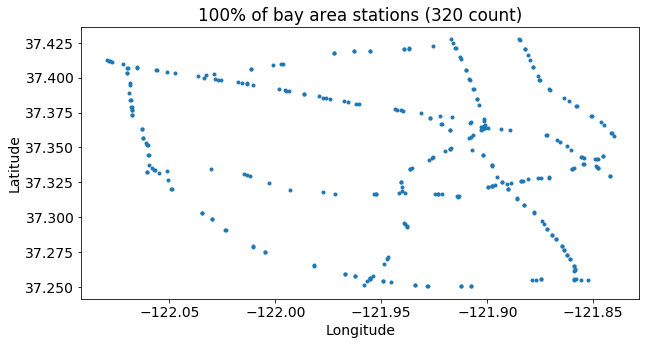

In [114]:
plt.plot(stations.longitude, stations.latitude, '.')

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('100% of bay area stations (320 count)')

In [116]:
adj_mx = pickle.load(open('./data/full_graph.pkl', 'rb'), encoding='latin1')

In [123]:
station_ids = [int(adj_mx.nodes[i]['sensor']) for i in adj_mx.nodes]
# station_ids           

In [118]:
len(station_ids)

320

In [119]:
len(set(bay_area_stations) - set(station_ids))

0

In [120]:
from random import sample
import matplotlib.pyplot as plt


# sample 25%

In [124]:
# sample_25 = sample(station_ids, int(len(station_ids)*0.25))
# len(sample_25)

In [125]:
# sample_25

sample_25 = [
    400017,
400040,
400052,
400059,
400065,
400073,
400085,
400100,
400148,
400178,
400221,
400240,
400257,
400258,
400268,
400278,
400280,
400298,
400336,
400418,
400436,
400457,
400461,
400485,
400519,
400637,
400649,
400654,
400664,
400690,
400700,
400713,
400714,
400715,
400717,
400750,
400772,
400792,
400822,
400832,
400837,
400842,
400916,
400934,
400995,
401129,
401154,
401163,
401167,
401327,
401388,
401400,
401457,
401495,
401555,
401567,
401597,
401606,
401611,
401942,
401943,
401957,
401958,
402067,
403329,
403414,
403419,
404370,
404451,
404452,
404453,
404461,
404462,
405613,
405619,
405701,
407710,
407711,
414284,
414694
]

In [127]:
len(sample_25)

80

C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5,1,'25% of bay area stations (80 count)')

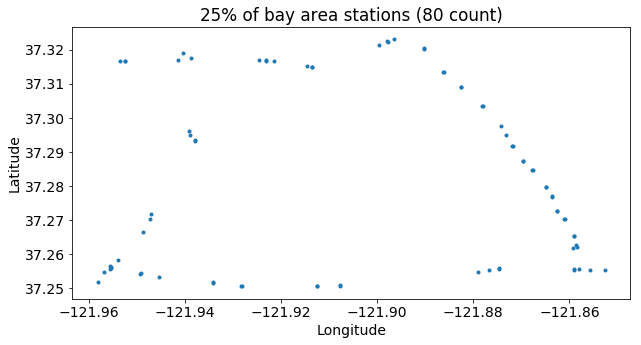

In [126]:
stations_temp = stations[[i in sample_25 for i in stations.sid]]
plt.plot(stations_temp.longitude, stations_temp.latitude, '.')

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('25% of bay area stations (80 count)')

# sample 50%

In [102]:
sample_50 = sample(station_ids, int(len(station_ids)*0.50))
len(sample_50)

160

In [130]:
sample_50 = [
    400017,
400040,
400052,
400057,
400059,
400065,
400073,
400084,
400085,
400097,
400100,
400147,
400148,
400178,
400185,
400209,
400213,
400221,
400222,
400236,
400240,
400257,
400258,
400268,
400278,
400280,
400292,
400298,
400336,
400400,
400414,
400418,
400429,
400436,
400457,
400461,
400464,
400485,
400499,
400507,
400514,
400519,
400560,
400563,
400582,
400637,
400648,
400649,
400654,
400664,
400665,
400673,
400677,
400688,
400690,
400700,
400709,
400713,
400714,
400715,
400717,
400723,
400750,
400772,
400792,
400799,
400804,
400822,
400823,
400828,
400832,
400837,
400842,
400907,
400916,
400934,
400951,
400952,
400953,
400995,
401129,
401154,
401163,
401167,
401210,
401224,
401327,
401388,
401391,
401400,
401403,
401457,
401495,
401555,
401567,
401597,
401606,
401611,
401655,
401808,
401809,
401810,
401811,
401845,
401846,
401890,
401891,
401906,
401908,
401942,
401943,
401957,
401958,
402056,
402057,
402058,
402059,
402067,
402359,
402360,
402361,
403329,
403401,
403402,
403404,
403406,
403409,
403412,
403414,
403419,
404370,
404434,
404435,
404444,
404451,
404452,
404453,
404461,
404462,
404640,
405613,
405619,
405701,
407165,
407172,
407173,
407194,
407321,
407331,
407344,
407370,
407373,
407710,
407711,
408907,
408911,
413877,
413878,
414284,
414694
]

In [131]:
len(sample_50)

160

C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5,1,'50% of bay area stations (160 count)')

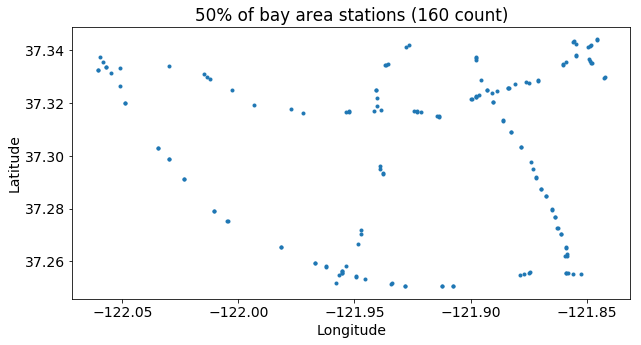

In [132]:
stations_temp = stations[[i in sample_50 for i in stations.sid]]
plt.plot(stations_temp.longitude, stations_temp.latitude, '.')

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('50% of bay area stations (160 count)')

# sample 75%

In [109]:
sample_75 = sample(station_ids, int(len(station_ids)*0.75))
len(sample_75)

240

In [133]:
sample_75 = [
400001,
400017,
400030,
400040,
400045,
400052,
400057,
400059,
400065,
400069,
400073,
400084,
400085,
400097,
400100,
400109,
400122,
400147,
400148,
400160,
400172,
400178,
400185,
400206,
400209,
400213,
400221,
400222,
400227,
400236,
400240,
400246,
400253,
400257,
400258,
400268,
400278,
400280,
400292,
400298,
400336,
400343,
400353,
400372,
400394,
400400,
400414,
400418,
400429,
400436,
400440,
400457,
400461,
400464,
400479,
400485,
400499,
400507,
400508,
400514,
400519,
400528,
400560,
400563,
400582,
400586,
400637,
400648,
400649,
400654,
400664,
400665,
400668,
400673,
400677,
400688,
400690,
400700,
400709,
400713,
400714,
400715,
400717,
400723,
400750,
400760,
400772,
400792,
400794,
400799,
400804,
400822,
400823,
400828,
400832,
400837,
400842,
400863,
400895,
400907,
400911,
400916,
400922,
400934,
400951,
400952,
400953,
400964,
400965,
400971,
400995,
400996,
401129,
401154,
401163,
401167,
401210,
401224,
401327,
401388,
401391,
401400,
401403,
401440,
401457,
401495,
401541,
401555,
401560,
401567,
401597,
401606,
401611,
401655,
401808,
401809,
401810,
401811,
401816,
401817,
401845,
401846,
401890,
401891,
401906,
401908,
401942,
401943,
401957,
401958,
401994,
402056,
402057,
402058,
402059,
402060,
402061,
402067,
402117,
402118,
402121,
402281,
402282,
402283,
402284,
402359,
402360,
402361,
402362,
402363,
402364,
402365,
402366,
402367,
403225,
403265,
403329,
403401,
403402,
403404,
403406,
403409,
403412,
403414,
403419,
404370,
404434,
404435,
404444,
404451,
404452,
404453,
404461,
404462,
404521,
404640,
404753,
404759,
405613,
405619,
405701,
407165,
407172,
407173,
407194,
407321,
407323,
407325,
407328,
407331,
407335,
407336,
407337,
407339,
407341,
407342,
407344,
407348,
407352,
407360,
407361,
407364,
407367,
407370,
407372,
407373,
407374,
407710,
407711,
408907,
408911,
409524,
409525,
409526,
409528,
409529,
413877,
413878,
414284,
414694,
]

C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\rmartinez4\Anaconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5,1,'75% of bay area stations (240 count)')

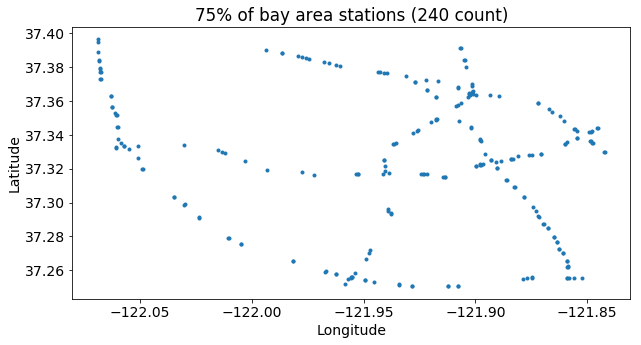

In [134]:
stations_temp = stations[[i in sample_75 for i in stations.sid]]
plt.plot(stations_temp.longitude, stations_temp.latitude, '.')

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('75% of bay area stations (240 count)')